# COMP-2231: Module 4 Assignment - Scenario 1
Trade Evaluation of Cale Makar vs Quinn Hughes with NHL player data

## Student Info:
- **Name:** Meng Wang
- **Student Number:** 0386174
- **Group:** 7  
- **Date of Submission:** 2025-10-12

### Assignment Overview
As part of the data analytics team for an NHL franchise, we've been tasked with evaluating two elite defensemen for a potential trade:
- **Cale Makar** (Player ID: 8480069) - Colorado Avalanche
- **Quinn Hughes** (Player ID: 8480800) - Vancouver Canucks

## 1. Ask Questions
1. **Overall Level**: How do the players differ in their output (points, goals, and assists) over the analyzed seasons?
    - What is their overall points, goals, primary and secondary assists?
    - Does Primary and Secondary Assists effect their goals and points?

2. **Career Trends and Consistency**: What are the performance trends for each player over time? Are they improving, declining, or maintaining a consistent level of production?
    - What is their season trend based on performance?
    - Do they have simillar trends if we use data Per game instead of total points?
    - Who is better on maintaining a consistent level?

3. **Performance vs. Expectation**: Are the players overperforming or underperforming their expected offensive output?
    - Who is overperforming or underperforming?
    - How about their goals differences?

4. **Player Style and Role**: What is each player's primary style? 
    - Do they all prefer High-Danger Shots?
    - What about their willingness to shoot?

5. **On-Ice Team Impact**: Which player has a greater positive impact on the team's overall offense/defense when they are on the ice?
    - onIce_xGoalsPercentage (Ratio of expected goals for vs. against when the player is on the ice. A value > 50% is excellent.)
    - OnIce_F_xGoals (Expected goals FOR the team with the player on the ice)
    - OnIce_A_xGoals (Expected goals AGAINST the team with the player on the ice)

## 2. Load and Prepare the Data

### 2.1 Data load and overall check

In [12]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported successfully!")
# Load the NHL player data
df = pd.read_csv('combined_player_data.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nFirst few rows:")
df.head()

Libraries imported successfully!
Dataset Shape: (45875, 154)

Columns: ['playerId', 'season', 'name', 'team', 'position', 'situation', 'games_played', 'icetime', 'shifts', 'gameScore', 'onIce_xGoalsPercentage', 'offIce_xGoalsPercentage', 'onIce_corsiPercentage', 'offIce_corsiPercentage', 'onIce_fenwickPercentage', 'offIce_fenwickPercentage', 'iceTimeRank', 'I_F_xOnGoal', 'I_F_xGoals', 'I_F_xRebounds', 'I_F_xFreeze', 'I_F_xPlayStopped', 'I_F_xPlayContinuedInZone', 'I_F_xPlayContinuedOutsideZone', 'I_F_flurryAdjustedxGoals', 'I_F_scoreVenueAdjustedxGoals', 'I_F_flurryScoreVenueAdjustedxGoals', 'I_F_primaryAssists', 'I_F_secondaryAssists', 'I_F_shotsOnGoal', 'I_F_missedShots', 'I_F_blockedShotAttempts', 'I_F_shotAttempts', 'I_F_points', 'I_F_goals', 'I_F_rebounds', 'I_F_reboundGoals', 'I_F_freeze', 'I_F_playStopped', 'I_F_playContinuedInZone', 'I_F_playContinuedOutsideZone', 'I_F_savedShotsOnGoal', 'I_F_savedUnblockedShotAttempts', 'penalties', 'I_F_penalityMinutes', 'I_F_faceOffsWon', 'I

,playerId,season,name,team,position,situation,games_played,icetime,shifts,gameScore,...,OffIce_F_xGoals,OffIce_A_xGoals,OffIce_F_shotAttempts,OffIce_A_shotAttempts,xGoalsForAfterShifts,xGoalsAgainstAfterShifts,corsiForAfterShifts,corsiAgainstAfterShifts,fenwickForAfterShifts,fenwickAgainstAfterShifts
0,8469459,2015,Mikko Koivu,MIN,C,other,82,7197.0,116.0,50.37,...,7.69,9.24,72.0,137.0,0.00,0.00,0.0,0.0,0.0,0.0
1,8469459,2015,Mikko Koivu,MIN,C,all,82,98051.0,1968.0,56.73,...,128.34,141.04,2672.0,3271.0,0.00,0.00,0.0,0.0,0.0,0.0
2,8469459,2015,Mikko Koivu,MIN,C,5on5,82,71041.0,1492.0,56.73,...,98.94,103.70,2298.0,2674.0,1.61,1.14,37.0,36.0,24.0,26.0
3,8469459,2015,Mikko Koivu,MIN,C,4on5,82,4366.0,153.0,42.91,...,2.05,18.92,35.0,338.0,0.00,0.11,0.0,1.0,0.0,1.0
4,8469459,2015,Mikko Koivu,MIN,C,5on4,82,15447.0,207.0,54.59,...,16.25,1.80,232.0,34.0,0.27,0.00,2.0,0.0,2.0,0.0


### 2.2 Data Cleaning，Filtering and Preparation

In [13]:
# Filter for 'all' situations (5v5, PP, SH combined)
df_filtered = df[df['situation'] == 'all'].copy()
print("After situation filter:", df_filtered.shape)

# Check for missing values in the filtered data
print("\nMissing Values\n-----------------------------")
missing_values = df_filtered.isnull().sum()
print(missing_values)


# Check for duplicate entries
print("\nDuplicate Entries\n-----------------------------")
duplicate_count = df_filtered.duplicated().sum()
print(duplicate_count)


# Filter for our two players: Cale Makar and Quinn Hughes
players_df = df_filtered.query("name == 'Cale Makar' or name == 'Quinn Hughes'")

print("\nFiltered Data Shape:", players_df.shape)
print("\nSeasons covered:")
print(sorted(players_df['season'].unique()))

After situation filter: (9175, 154)

Missing Values
-----------------------------
playerId                     0
season                       0
name                         0
team                         0
position                     0
                            ..
xGoalsAgainstAfterShifts     0
corsiForAfterShifts          0
corsiAgainstAfterShifts      0
fenwickForAfterShifts        0
fenwickAgainstAfterShifts    0
Length: 154, dtype: int64

Duplicate Entries
-----------------------------
0

Filtered Data Shape: (13, 154)

Seasons covered:
[2018, 2019, 2020, 2021, 2022, 2023, 2024]


In [14]:
# Select key columns for analysis
analysis_columns = [
    'season', 'name', 'team', 'position', 'games_played',
    'I_F_points', 'I_F_goals', 'I_F_primaryAssists', 'I_F_secondaryAssists',
    'I_F_xGoals', 'I_F_shotAttempts', 'onIce_xGoalsPercentage', 'OnIce_F_xGoals', 'OnIce_A_xGoals',
    'OffIce_F_xGoals', 'OffIce_A_xGoals', 'shotsBlockedByPlayer', 'I_F_dZoneGiveaways'
]

# Create analysis dataframe
analysis_df = players_df[analysis_columns].copy()
# calculate PPG and GPG
analysis_df['PPG'] = analysis_df['I_F_points'] / analysis_df['games_played']
analysis_df['GPG'] = analysis_df['I_F_goals'] / analysis_df['games_played']
analysis_df['PrimaryAssistsPerGame'] = analysis_df['I_F_primaryAssists'] / analysis_df['games_played']
analysis_df['SecondaryAssistsPerGame'] = analysis_df['I_F_secondaryAssists'] / analysis_df['games_played']
analysis_df['shotsBlockedPerGame'] = analysis_df['shotsBlockedByPlayer'] / analysis_df['games_played']
analysis_df['DZoneGiveawaysPerGame'] = analysis_df['I_F_dZoneGiveaways'] / analysis_df['games_played']

# Calculate goal difference (Goals - xGoals)
analysis_df['Goal_Diff'] = analysis_df['I_F_goals'] - analysis_df['I_F_xGoals']

print("Analysis DataFrame created!")
print(analysis_df[
    ['season', 'name', 'games_played',
    'I_F_points', 'I_F_goals', 'I_F_primaryAssists', 'I_F_secondaryAssists',
    'I_F_xGoals', 'I_F_shotAttempts', 'onIce_xGoalsPercentage', 'OnIce_F_xGoals', 'OnIce_A_xGoals', 'OffIce_F_xGoals', 'OffIce_A_xGoals',
    'PPG', 'GPG', 'Goal_Diff'
    ]
    ].head())

Analysis DataFrame created!
       season          name  games_played  I_F_points  I_F_goals  \
15571    2018  Quinn Hughes             5         3.0        0.0   
19676    2019    Cale Makar            57        50.0       12.0   
21076    2019  Quinn Hughes            68        53.0        8.0   
24066    2020    Cale Makar            44        44.0        8.0   
26596    2020  Quinn Hughes            56        41.0        3.0   

       I_F_primaryAssists  I_F_secondaryAssists  I_F_xGoals  I_F_shotAttempts  \
15571                 3.0                   0.0        0.23              12.0   
19676                22.0                  16.0        8.92             272.0   
21076                23.0                  22.0        5.84             311.0   
24066                22.0                  14.0        5.26             225.0   
26596                20.0                  18.0        4.89             233.0   

       onIce_xGoalsPercentage  OnIce_F_xGoals  OnIce_A_xGoals  \
15571      

## 3. Explore and Visualize

### 3.1 Overall Production Comparison
This section will demonstrate overall comparison analysis:
- total goals by season 
- total points by season
- point per game by season
- goals per game by season
- primary and secondary assists by season
- average goals/points/primary/secondary assists 
- heatmap to show correlation between goals/points/primary/secondary assists 

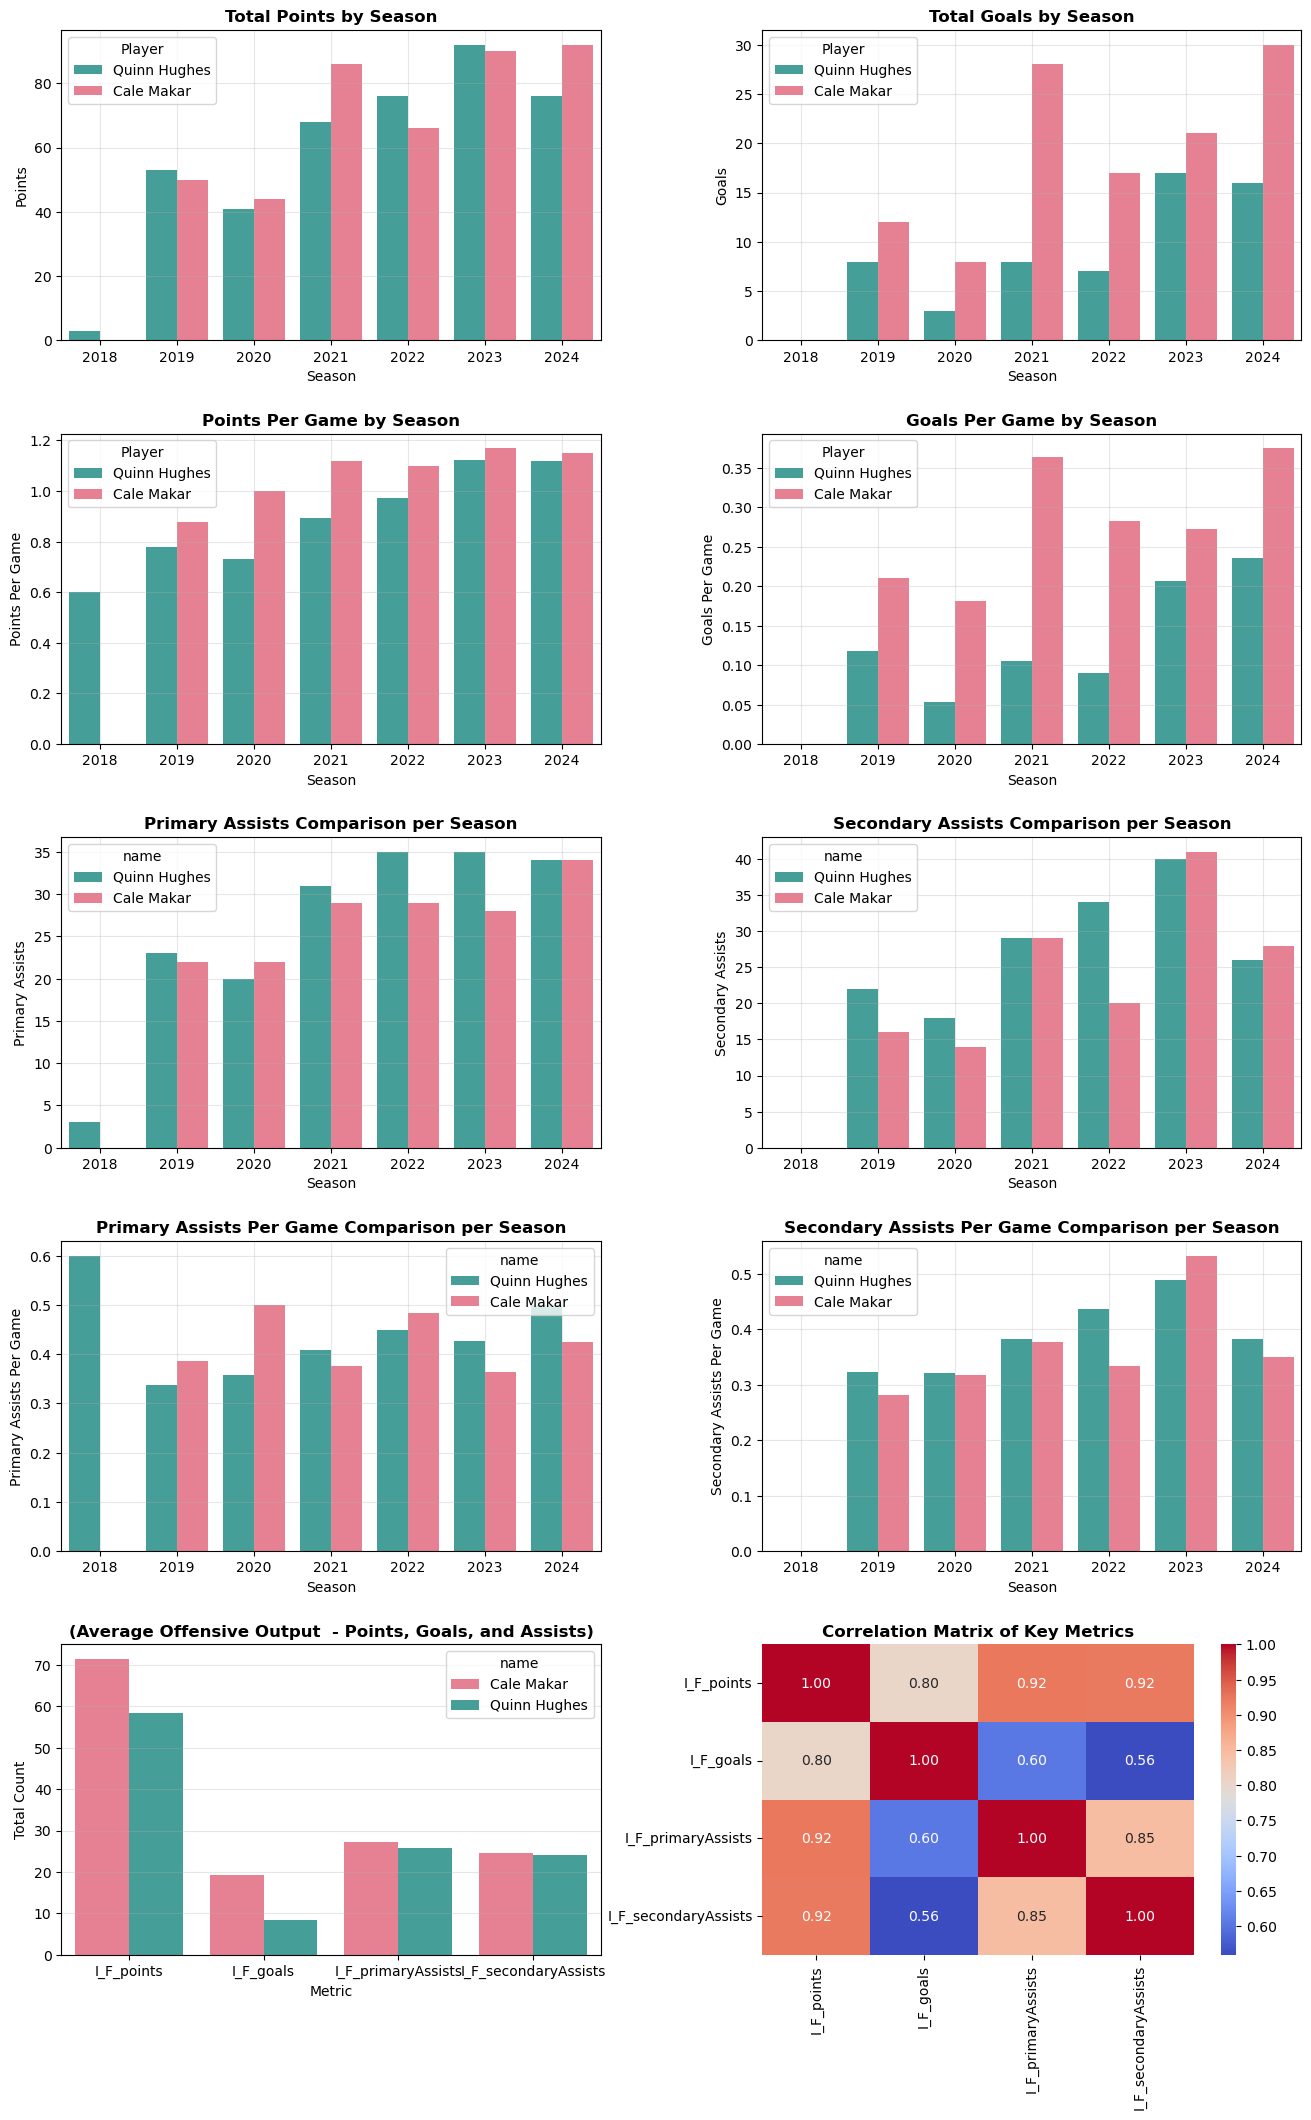

<Figure size 1000x600 with 0 Axes>

Mean points, goals, primary and secondary assists per player:
 ----------------------------------------------
              I_F_points  I_F_goals  I_F_primaryAssists  I_F_secondaryAssists
name                                                                         
Cale Makar     71.333333  19.333333           27.333333             24.666667
Quinn Hughes   58.428571   8.428571           25.857143             24.142857
Correlation between assists and points
 ----------------------------------------------
{'Primary Assists vs Points': 0.9233887098531423, 'Secondary Assists vs Points': 0.9215138117874074}


In [15]:
# set plot style
sns.set_palette("husl")
palette = sns.color_palette("husl", 2)
colors = {
    'Cale Makar': palette[0],
    'Quinn Hughes': palette[1]
}

# Create subplots
fig, axes = plt.subplots(5, 2, figsize=(16, 25))
fig.subplots_adjust(hspace=0.3, wspace=0.3)

# ------------------------------
# 1. Points by Season - Bar Plot
sns.barplot(
    data=analysis_df, x='season', y='I_F_points', hue='name', palette=colors, ax=axes[0, 0]
)
axes[0, 0].set_title('Total Points by Season', fontweight='bold')
axes[0, 0].set_ylabel('Points')
axes[0, 0].set_xlabel('Season')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].legend(title='Player')

# ------------------------------
# 2. Goals by Season - Bar Plot
sns.barplot(
    data=analysis_df, x='season', y='I_F_goals', hue='name', palette=colors, ax=axes[0, 1]
)
axes[0, 1].set_title('Total Goals by Season', fontweight='bold')
axes[0, 1].set_ylabel('Goals')
axes[0, 1].set_xlabel('Season')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].legend(title='Player')

# 3. Points per Game by Season - Bar Plot
sns.barplot(
    data=analysis_df, x='season', y='PPG', hue='name', palette=colors, ax=axes[1, 0]
)
axes[1, 0].set_title('Points Per Game by Season', fontweight='bold')
axes[1, 0].set_ylabel('Points Per Game')
axes[1, 0].set_xlabel('Season')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].legend(title='Player')

# ------------------------------
# 4. Goals per Game by Season - Bar Plot
sns.barplot(
    data=analysis_df, x='season', y='GPG', hue='name', palette=colors, ax=axes[1, 1]
)
axes[1, 1].set_title('Goals Per Game by Season', fontweight='bold')
axes[1, 1].set_ylabel('Goals Per Game')
axes[1, 1].set_xlabel('Season')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].legend(title='Player')

# ------------------------------
# 5. Primary Assists Comparison (Bar)
sns.barplot(
    data=analysis_df, x='season', y='I_F_primaryAssists', hue='name', palette=colors, ax=axes[2, 0]
)
axes[2, 0].set_title('Primary Assists Comparison per Season', fontweight='bold')
axes[2, 0].set_ylabel('Primary Assists')
axes[2, 0].set_xlabel('Season')
axes[2, 0].grid(True, alpha=0.3)

# ------------------------------
# 6. Secondary Assists Comparison (Bar)
sns.barplot(
    data=analysis_df, x='season', y='I_F_secondaryAssists', hue='name', palette=colors, ax=axes[2, 1]
)
axes[2, 1].set_title('Secondary Assists Comparison per Season', fontweight='bold')
axes[2, 1].set_ylabel('Secondary Assists')
axes[2, 1].set_xlabel('Season')
axes[2, 1].grid(True, alpha=0.3)

# ------------------------------
# 7. Primary Assists per Game Comparison (Bar)
sns.barplot(
    data=analysis_df, x='season', y='PrimaryAssistsPerGame', hue='name', palette=colors, ax=axes[3, 0]
)
axes[3, 0].set_title('Primary Assists Per Game Comparison per Season', fontweight='bold')
axes[3, 0].set_ylabel('Primary Assists Per Game')
axes[3, 0].set_xlabel('Season')
axes[3, 0].grid(True, alpha=0.3)

# ------------------------------
# 8. Secondary Assists Per Game Comparison (Bar)
sns.barplot(
    data=analysis_df, x='season', y='SecondaryAssistsPerGame', hue='name', palette=colors, ax=axes[3, 1]
)
axes[3, 1].set_title('Secondary Assists Per Game Comparison per Season', fontweight='bold')
axes[3, 1].set_ylabel('Secondary Assists Per Game')
axes[3, 1].set_xlabel('Season')
axes[3, 1].grid(True, alpha=0.3)
# ------------------------------
# 9. Overall Offensive Output Summary (Bar Plot)
offense_summary = (
    analysis_df.groupby('name')[['I_F_points', 'I_F_goals', 'I_F_primaryAssists', 'I_F_secondaryAssists']].mean().reset_index()
    .melt(id_vars='name', var_name='Metric', value_name='Total')
)

plt.figure(figsize=(10,6))
sns.barplot(data=offense_summary, x='Metric', y='Total', hue='name', palette=colors, ax=axes[4, 0])

axes[4, 0].set_title('(Average Offensive Output  - Points, Goals, and Assists)', fontweight='bold')
axes[4, 0].set_xlabel('Metric')
axes[4, 0].set_ylabel('Total Count')
axes[4, 0].grid(axis='y', alpha=0.3)

# ------------------------------
# 10. correlation matrix heatmap
corr_columns = [
    'I_F_points', 'I_F_goals', 'I_F_primaryAssists', 'I_F_secondaryAssists'
]   
corr = analysis_df[corr_columns].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', ax=axes[4, 1])
axes[4, 1].set_title('Correlation Matrix of Key Metrics', fontweight='bold')


plt.tight_layout()
plt.show()

print("Mean points, goals, primary and secondary assists per player:\n ----------------------------------------------")
print(analysis_df.groupby('name')[['I_F_points', 'I_F_goals', 'I_F_primaryAssists', 'I_F_secondaryAssists']].mean())
print("Correlation between assists and points\n ----------------------------------------------")
corr_primary = analysis_df['I_F_primaryAssists'].corr(analysis_df['I_F_points'])
corr_secondary = analysis_df['I_F_secondaryAssists'].corr(analysis_df['I_F_points'])
corr = {'Primary Assists vs Points': corr_primary, 'Secondary Assists vs Points': corr_secondary}
print(corr)

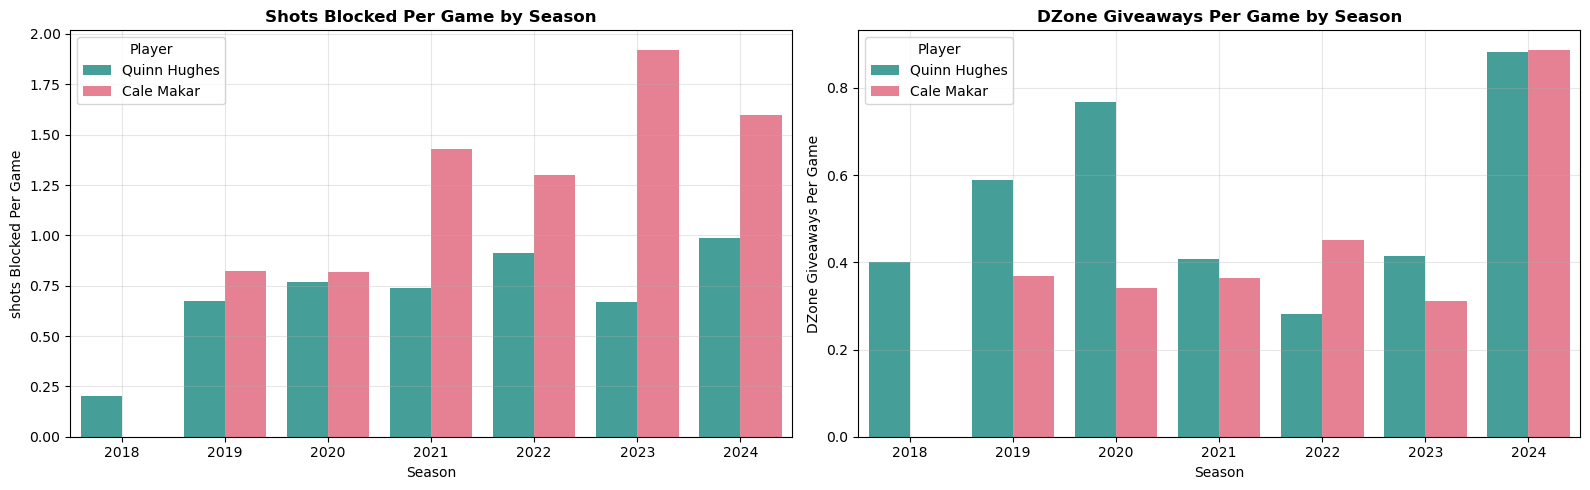

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
fig.subplots_adjust(hspace=0.3, wspace=0.3)

sns.barplot(
    data=analysis_df, x='season', y='shotsBlockedPerGame', hue='name', palette=colors, ax=axes[0]
)
axes[0].set_title('Shots Blocked Per Game by Season', fontweight='bold')
axes[0].set_ylabel('shots Blocked Per Game')
axes[0].set_xlabel('Season')
axes[0].grid(True, alpha=0.3)
axes[0].legend(title='Player')

sns.barplot(
    data=analysis_df, x='season', y='DZoneGiveawaysPerGame', hue='name', palette=colors, ax=axes[1]
)
axes[1].set_title('DZone Giveaways Per Game by Season', fontweight='bold')
axes[1].set_ylabel('DZone Giveaways Per Game')
axes[1].set_xlabel('Season')
axes[1].grid(True, alpha=0.3)
axes[1].legend(title='Player')

plt.tight_layout()
plt.show()

#### 3.1-Obeservation of Overall Offensive Production Results

1. **Total Points Production:**
   - Overall, **Cale Makar** and **Quinn Hughes** have similar point in every season
   - During 2019, 2022 and 2023, their point is simillart but **Quinn Hughes** is a little bit higher
   - During 2020, 2021 and 2024, **Cale Makar**'s point is higher than **Quinn Hughes**, especially in 2021 and 2024, his point is much higher.

2. **Total Goals Patterns:**
   - **Makar** has higher total goal per season, indicating stronger finishing ability

3. **point per game by season**
   - Cale Makar has higher point per game than Quinn in every season

4. **goals per game by season**
   - Cale Makar has much higher point per game than Quinn in every season

3. **Primary Assist**
   - Except 2020,  **Hughes** shows stronger result in primary assists
   - Although **Makar**'s Primary Assist is lower, still show strong and solid assist production
   - Primary assists is the one of main reason that **Quinn Hughes**'s goal is lower than **Cale Makar**, but the total point is similar

4. **Secondary Assist**
   - 2019, 2020, 2022, **Quinn Hughes** has more secondary assists
   - The other season both players contribute at relatively similar levels

5. **Average Output**
   - **Cale Makar**'s average points and goals level  is much higher than **Quinn Hughes** 
   - Their Average Primary/Secondary Assists relatively the same level
   - Their Secondary Assists per game is simillar, but Primary assist per game of Cale Makar in 2019, 2020, 2022, is higher, in the other year Quinn is higher. 

6. **Correlation**
   - Points show strong correlation with primary and secondary assist, explain that why Quin has similar point but less goals.

7. **Defense core data**
   - Short blocked game by season, Cale is much better than Quinn Hughes, showing he is a very good defense player.
   - Cale's Dzone giveaway data is lower than Quinn, this is a good sign to show he has less mistake when playying.

### 3.2 Trend and Consistency
This section will demonstrate trend analysis and consistency analysis:
- line chart - total goals by season trend
- line chart - total points by season trend
- box chart - points per game
- line chart - points per game and goal per game trend
- caculation - mean, standard deviation, variance

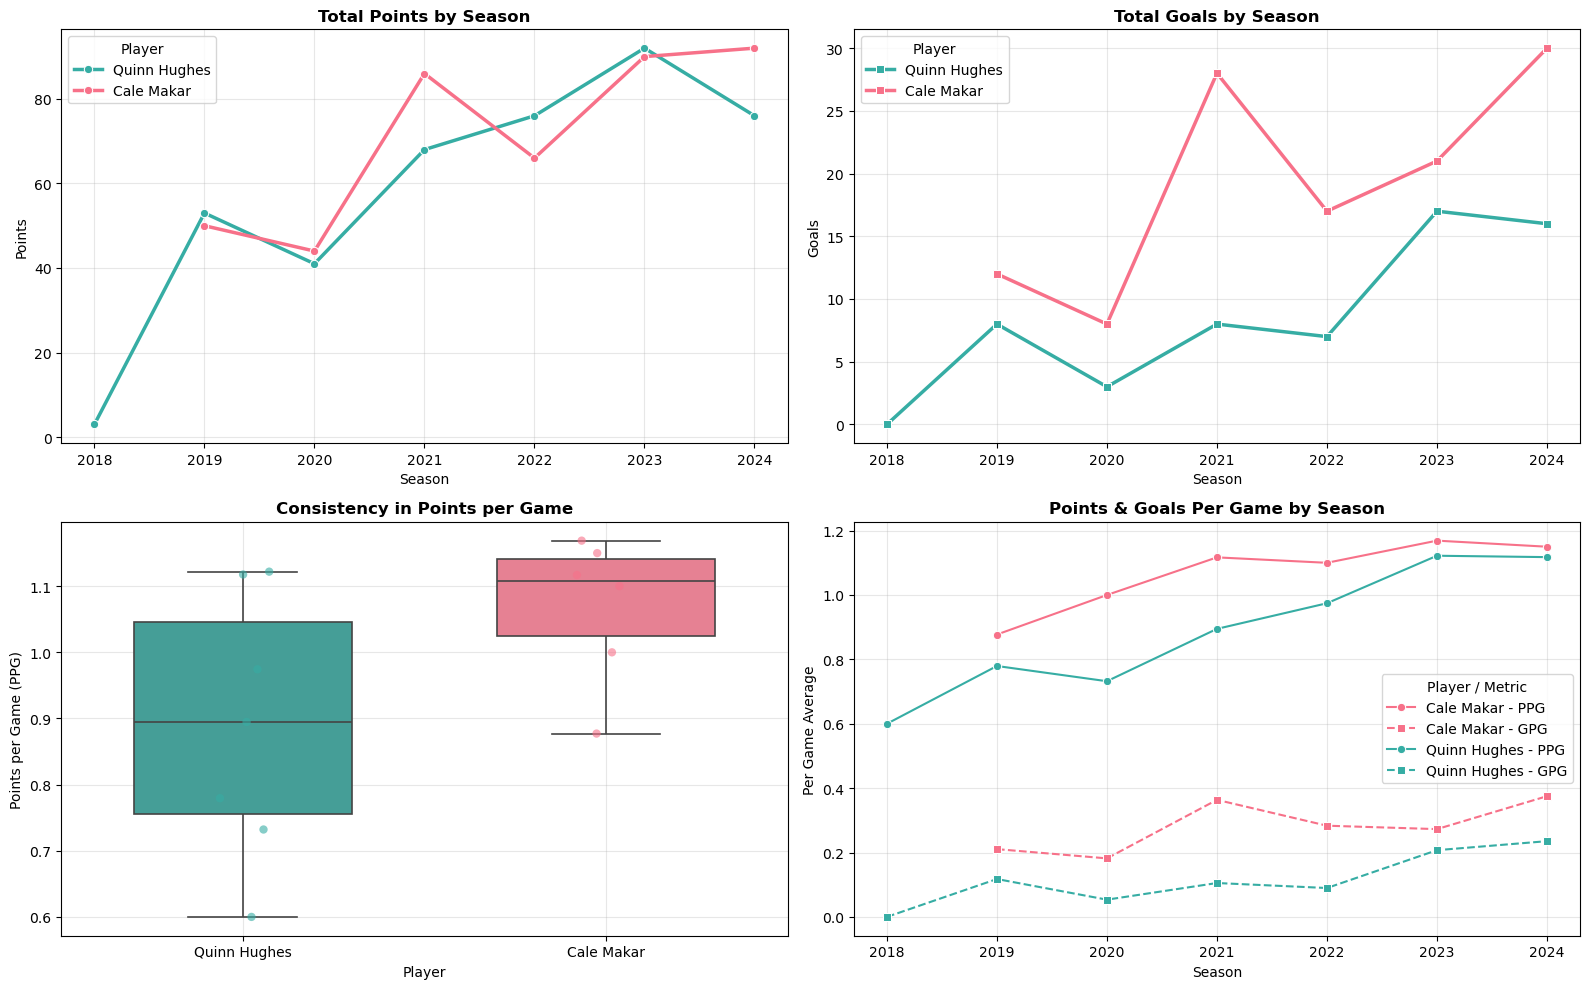

Point Per Game for Cale Makar
             name  season       PPG       GPG
19676  Cale Makar    2019  0.877193  0.210526
24066  Cale Makar    2020  1.000000  0.181818
29541  Cale Makar    2021  1.116883  0.363636
35806  Cale Makar    2022  1.100000  0.283333
37871  Cale Makar    2023  1.168831  0.272727
44401  Cale Makar    2024  1.150000  0.375000

Point Per Game for Quinn Hughes
               name  season       PPG       GPG
15571  Quinn Hughes    2018  0.600000  0.000000
21076  Quinn Hughes    2019  0.779412  0.117647
26596  Quinn Hughes    2020  0.732143  0.053571
27431  Quinn Hughes    2021  0.894737  0.105263
33116  Quinn Hughes    2022  0.974359  0.089744
40276  Quinn Hughes    2023  1.121951  0.207317
45816  Quinn Hughes    2024  1.117647  0.235294

PPG Consistency Stats
        name     mean      std      var
  Cale Makar 1.068818 0.110754 0.012266
Quinn Hughes 0.888607 0.197484 0.039000

GPG Consistency Stats
        name     mean      std      var
  Cale Makar 0.281174 0.0

In [17]:
# set plot style
sns.set_palette("husl")
palette = sns.color_palette("husl", 2)
colors = {
    'Cale Makar': palette[0],
    'Quinn Hughes': palette[1]
}

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.subplots_adjust(hspace=0.35, wspace=0.3)

# ------------------------------
# 1. Points by Season - Line Plot
sns.lineplot(
    data=analysis_df, x='season', y='I_F_points', hue='name', palette=colors, marker='o', linewidth=2.5, ax=axes[0, 0]
)
axes[0, 0].set_title('Total Points by Season', fontweight='bold')
axes[0, 0].set_ylabel('Points')
axes[0, 0].set_xlabel('Season')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].legend(title='Player')

# ------------------------------
# 2. Goals by Season - Line Plot
sns.lineplot(
    data=analysis_df, x='season', y='I_F_goals', hue='name', palette=colors, marker='s', linewidth=2.5, ax=axes[0, 1]
)
axes[0, 1].set_title('Total Goals by Season', fontweight='bold')
axes[0, 1].set_ylabel('Goals')
axes[0, 1].set_xlabel('Season')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].legend(title='Player')

# ------------------------------
# 3. consistency - PPG
sns.boxplot(
    data=analysis_df, x='name', y='PPG', hue='name', palette=colors, ax=axes[1, 0], width=0.6, linewidth=1.2)

sns.stripplot(
    data=analysis_df, x='name', y='PPG', hue='name', palette=colors, ax=axes[1, 0], size=6, jitter=True, alpha=0.6
)

axes[1, 0].set_title('Consistency in Points per Game', fontweight='bold')
axes[1, 0].set_ylabel('Points per Game (PPG)')
axes[1, 0].set_xlabel('Player')
axes[1, 0].grid(True, alpha=0.3)

# ------------------------------
# 4. consistency - GPG
for player in ['Cale Makar', 'Quinn Hughes']:
    sub_df = analysis_df[analysis_df['name'] == player]
    sns.lineplot(
        data=sub_df, x='season', y='PPG', marker='o', linestyle='-', label=f'{player} - PPG', color=colors[player]
    )
    sns.lineplot(
        data=sub_df, x='season', y='GPG', marker='s', linestyle='--', label=f'{player} - GPG', color=colors[player]
    )

plt.title('Points & Goals Per Game by Season', fontweight='bold')
plt.ylabel('Per Game Average')
plt.xlabel('Season')
plt.grid(True, alpha=0.3)
plt.legend(title='Player / Metric')


plt.tight_layout()
plt.show()

print("Point Per Game for Cale Makar")
print(analysis_df[analysis_df['name'] == 'Cale Makar'][['name', 'season', 'PPG', 'GPG']])
print("\nPoint Per Game for Quinn Hughes")
print(analysis_df[analysis_df['name'] == 'Quinn Hughes'][['name', 'season', 'PPG', 'GPG']])


#Add variance / std summary
ppg_stats = analysis_df.groupby('name')['PPG'].agg(['mean', 'std', 'var']).reset_index()
gpg_stats = analysis_df.groupby('name')['GPG'].agg(['mean', 'std', 'var']).reset_index()

print("\nPPG Consistency Stats")
print(ppg_stats.to_string(index=False))

print("\nGPG Consistency Stats")
print(gpg_stats.to_string(index=False))


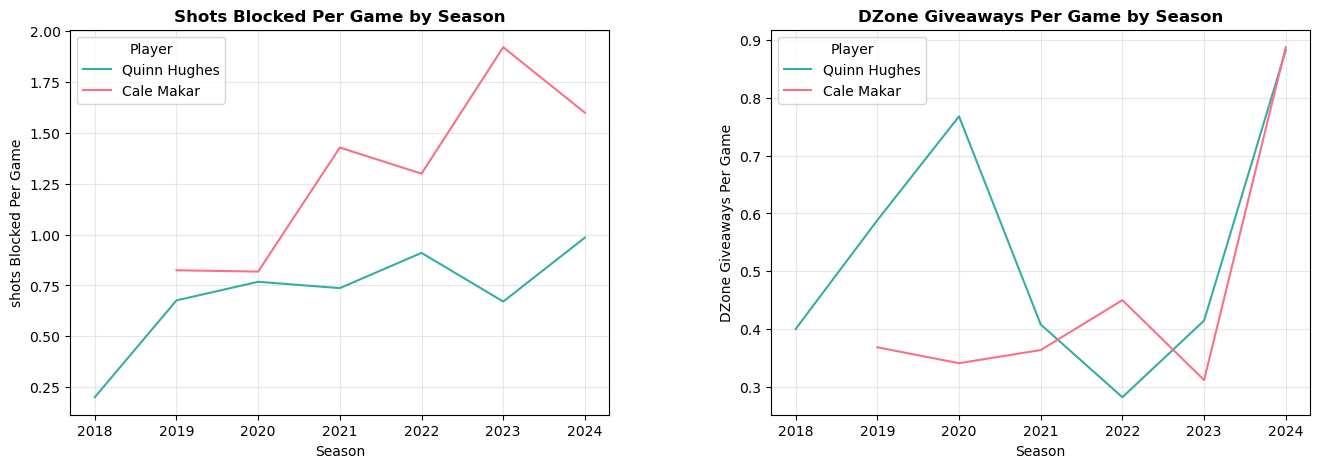

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
fig.subplots_adjust(hspace=0.3, wspace=0.3)

sns.lineplot(
    data=analysis_df, x='season', y='shotsBlockedPerGame', hue='name', palette=colors, ax=axes[0]
)
axes[0].set_title('Shots Blocked Per Game by Season', fontweight='bold')
axes[0].set_ylabel('shots Blocked Per Game')
axes[0].set_xlabel('Season')
axes[0].grid(True, alpha=0.3)
axes[0].legend(title='Player')

sns.lineplot(
    data=analysis_df, x='season', y='DZoneGiveawaysPerGame', hue='name', palette=colors, ax=axes[1]
)
axes[1].set_title('DZone Giveaways Per Game by Season', fontweight='bold')
axes[1].set_ylabel('DZone Giveaways Per Game')
axes[1].set_xlabel('Season')
axes[1].grid(True, alpha=0.3)
axes[1].legend(title='Player')

#### 3.2-Obeservation of Trend and Consistency

1. **Points Trend Over Time (Line Chart):**
   - **Cale Makar**: Shows an upward improvement with notable peaks in 2021 and 2024, data in 2021 is much higher than **Quinn Hughes** but slightly lower than **Quinn Hughes** in 2022.
   - **Quinn Hughes**: Displays more consistent production with less dramatic fluctuations, maintaining steady performance levels going upward.
   - **Overall**: Both shows an ascending trend, while Hughes maintains more stable production

2. **Goals Trend Over Time (Line Chart):**
   - **Makar**: Clear upward trend in goal scoring, with significant increases in 2021 season
   - **Hughes**: More moderate and consistent goal production
   - **Overall**: Both shows an ascending trend, Makar's goal appears to be improving significantly over time and much higher than Hughes.

3. **Points Per Game (Box Plot):**
   - **Makar**'s median PPG is higher than Quinn Hughes’, meaning Makar generally produces more points per game.
   - **Makar**'s box is narrower, showing that PPG varies less. In contrast, Hughes has a wider box, meaning greater fluctuation in performance.
   - **Hughes**’s data shows a broader range and possibly lower minimum PPG, suggesting more inconsistency and occasional weaker performances.
   - Both players reach similar maximum PPG values, meaning when Hughes performs well, he can reach Makar’s level — just less frequently.

4. **Per Game Efficiency Trends (PPG vs GPG):**
   - Both **Cale Makar** and **Quinn Hughes** have improved their Points per Game over time, showing consistent offensive development throughout the seasons.
   - **Makar** maintains higher PPG and GPG (Goals per Game) than **Hughes**, suggesting stronger offensive efficiency.
   - By 2023–2024, Hughes’ PPG almost catches up to Makar’s.
   - Goals per game are much lower than points per game (since assists contribute more), but Makar consistently scores more goals than Hughes.
   - While Makar started at a higher level, Hughes’ performance shows a smoother and more gradual improvement, implying growing maturity and confidence.

5. **Consistency(Str and Var)**
   - Makar produces more points per game, he’s also more stable — his standard deviation (0.11) is nearly half of Hughes’ (0.20).
   - Both players have similar variance in Goals Per Game (≈0.08), but the mean gap is huge — Makar doubles Hughes’ scoring rate.
   - Cale Makar demonstrates both higher and more consistent offensive production across seasons

5. **Defense Data**
   - Both player's blocked data is upward trend, but Cale Makar's block number is better than Quinn
   - For Giveaway, both players have inceasing mistaken rate since 2023, but before 2023, Cale Makar is more stable and has lower giveaway.

### 3.3 Expected Goals vs Actual Goals Analysis
This section will demonstrate Expected Goals vs Actual Goals:
- scatter chart - Expected Goals vs Actual Goals

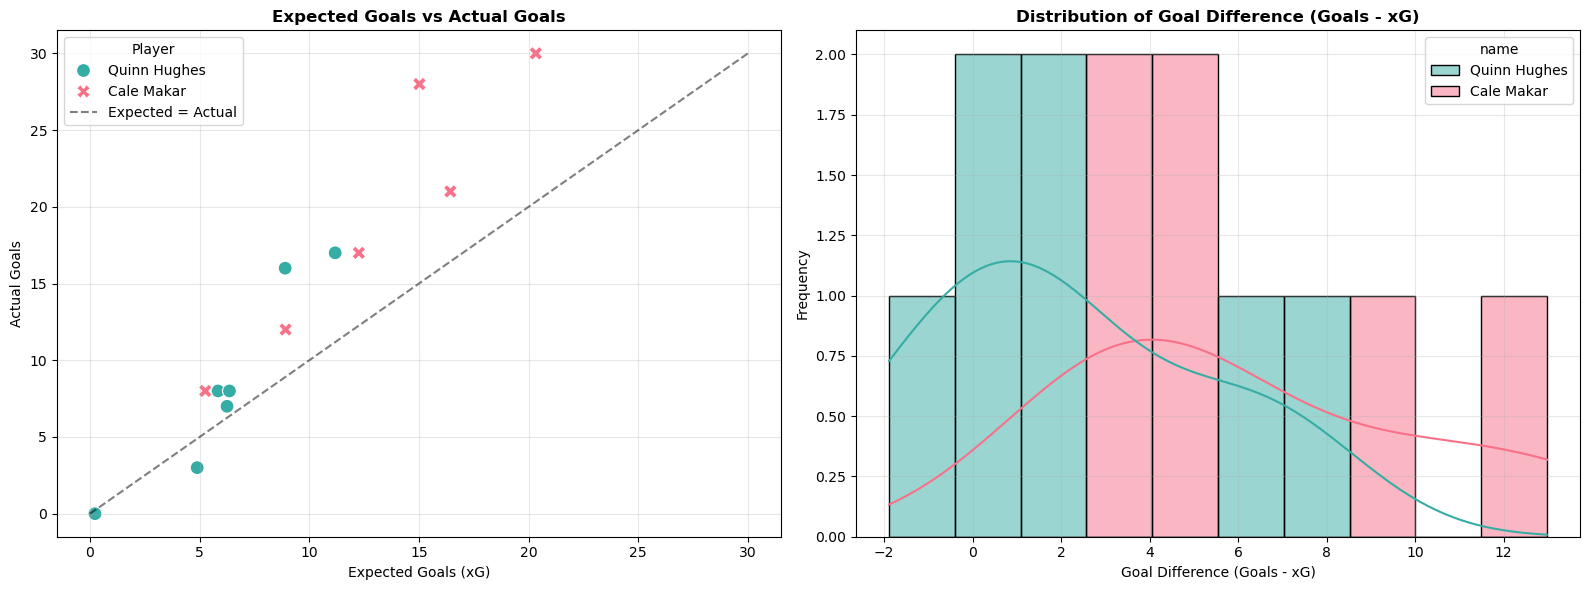

Seasons where players exceeded xG:
               name  season  I_F_goals  I_F_xGoals  Goal_Diff
19676    Cale Makar    2019       12.0        8.92       3.08
21076  Quinn Hughes    2019        8.0        5.84       2.16
24066    Cale Makar    2020        8.0        5.26       2.74
27431  Quinn Hughes    2021        8.0        6.36       1.64
29541    Cale Makar    2021       28.0       15.02      12.98
33116  Quinn Hughes    2022        7.0        6.25       0.75
35806    Cale Makar    2022       17.0       12.26       4.74
37871    Cale Makar    2023       21.0       16.43       4.57
40276  Quinn Hughes    2023       17.0       11.18       5.82
44401    Cale Makar    2024       30.0       20.33       9.67
45816  Quinn Hughes    2024       16.0        8.90       7.10

Seasons where players did not meet xG:
               name  season  I_F_goals  I_F_xGoals  Goal_Diff
15571  Quinn Hughes    2018        0.0        0.23      -0.23
26596  Quinn Hughes    2020        3.0        4.89      -

In [19]:
# Create subplots for side-by-side comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Left plot: Expected Goals vs Actual Goals
sns.scatterplot(
    data=analysis_df, x='I_F_xGoals', y='I_F_goals', hue='name', style='name', s=100, palette=colors, ax=axes[0]
)

# Add diagonal line (perfect correlation)
max_val = max(analysis_df['I_F_xGoals'].max(), analysis_df['I_F_goals'].max())
axes[0].plot([0, max_val], [0, max_val], 'k--', alpha=0.5, label='Expected = Actual')

axes[0].set_title('Expected Goals vs Actual Goals', fontweight='bold')
axes[0].set_xlabel('Expected Goals (xG)')
axes[0].set_ylabel('Actual Goals')
axes[0].legend(title='Player')
axes[0].grid(True, alpha=0.3)

# Right plot: Goal Difference Distribution
sns.histplot(data=analysis_df, x='Goal_Diff', hue='name', bins=10, kde=True, palette=colors, ax=axes[1])
axes[1].set_title('Distribution of Goal Difference (Goals - xG)', fontweight='bold')
axes[1].set_xlabel('Goal Difference (Goals - xG)')
axes[1].set_ylabel('Frequency')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Goals_above_xG = analysis_df[analysis_df['Goal_Diff'] > 0]
Goals_below_xG = analysis_df[analysis_df['Goal_Diff'] <= 0]
print("Seasons where players exceeded xG:")
print(Goals_above_xG[['name', 'season', 'I_F_goals', 'I_F_xGoals', 'Goal_Diff']])
print("\nSeasons where players did not meet xG:")
print(Goals_below_xG[['name', 'season', 'I_F_goals', 'I_F_xGoals', 'Goal_Diff']])

#### 3.3-Obeservation of Trend and Consistency
- Both player showed over performance in most situation
- Cale Makar consistently exceeds expectations
- Quinn Hughes aligns more closely with expectations, and two situation are underperformance
- Makar shows greater outperformance variance

### 3.4 Player Style Analysis (per game)
This section will demonstrate Player Style based on metrics pergame using violinplot:
- 'I_F_goals'
- 'I_F_primaryAssists'
- 'I_F_secondaryAssists'
- 'I_F_highDangerShots'
- 'I_F_shotAttempts'
- 'I_F_xGoals_with_earned_rebounds'
- games_played

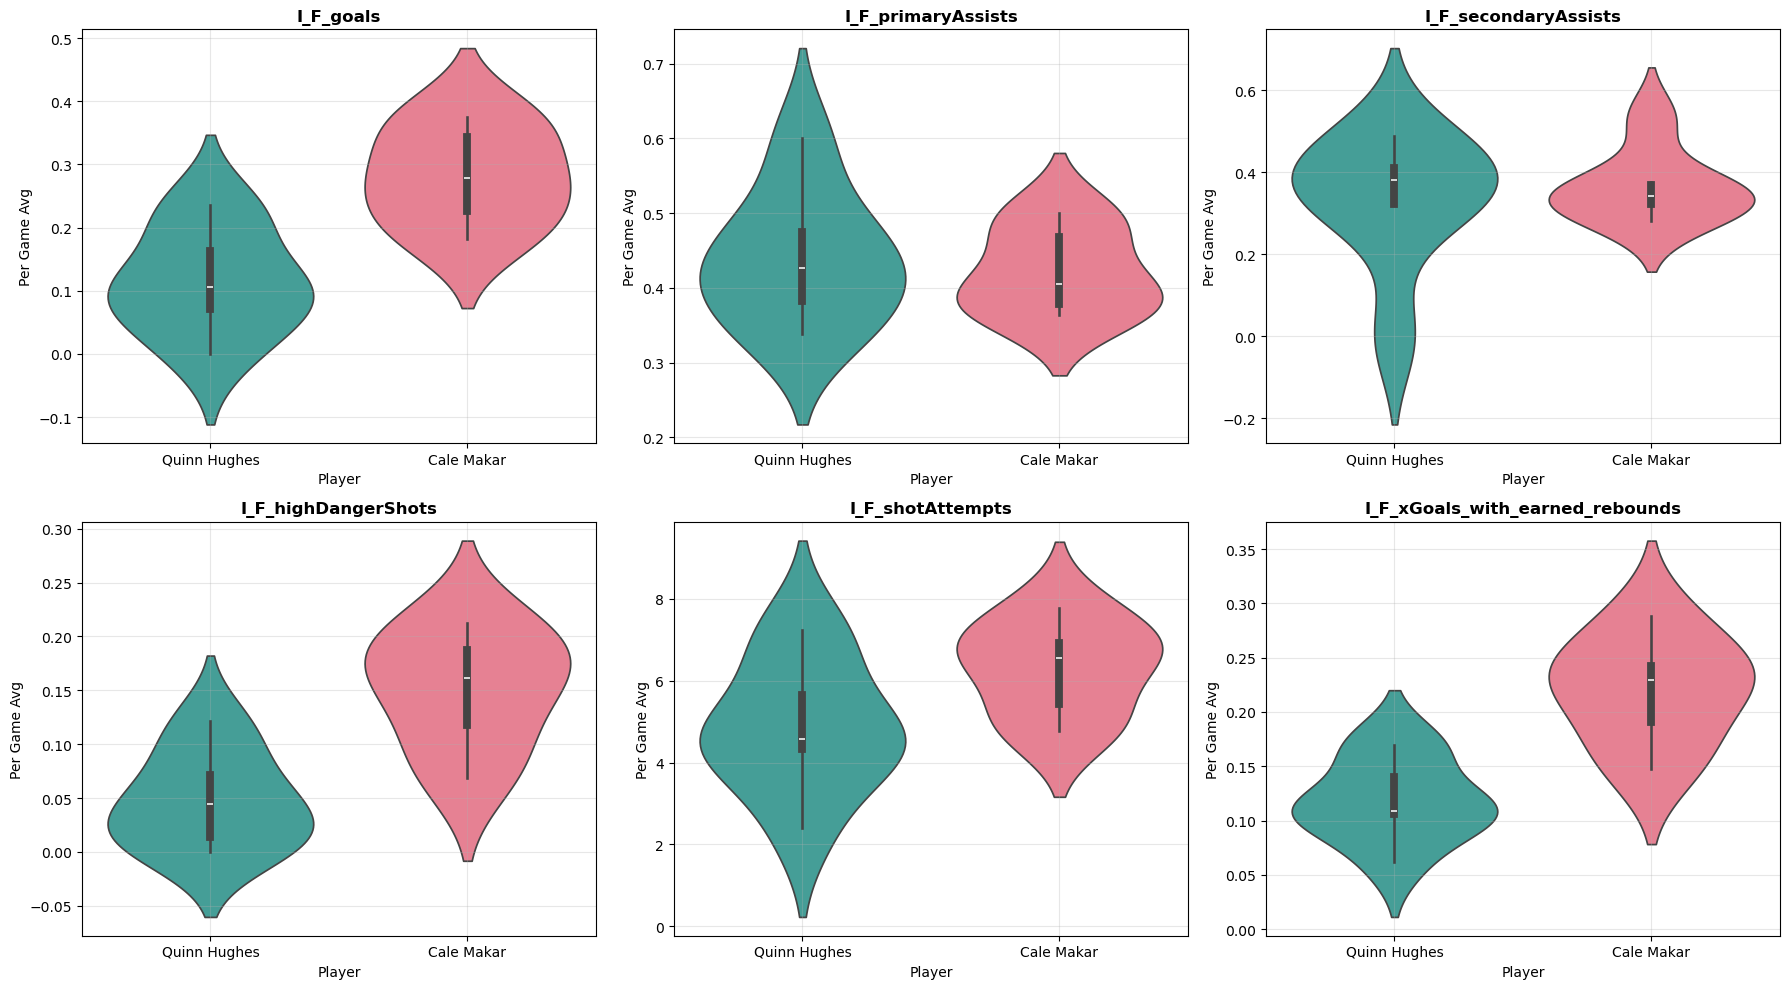

In [20]:
# using per game metrics for better comparison
players_per_game = players_df.copy()
per_game_metrics = ['I_F_goals', 'I_F_primaryAssists', 'I_F_secondaryAssists', 
                   'I_F_highDangerShots', 'I_F_shotAttempts', 'I_F_xGoals_with_earned_rebounds']

# Calculate per game metrics
for metric in per_game_metrics:
    players_per_game[f'{metric}_per_game'] = players_per_game[metric] / players_per_game['games_played']


metrics_per_game = [f'{m}_per_game' for m in per_game_metrics]

fig, axes = plt.subplots(2, 3, figsize=(18, 10))  
axes = axes.flatten()

for i, metric in enumerate(metrics_per_game):
    sns.violinplot(
        data=players_per_game,
        x='name',
        y=metric,
        palette=colors,
        ax=axes[i],
        hue='name'
    )
    axes[i].set_title(metric.replace('_per_game',''), fontweight='bold')
    axes[i].set_ylabel('Per Game Avg')
    axes[i].set_xlabel('Player')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


#### 3.4-Obeservation of Player Style

- Goals (I_F_goals): Makar’s distribution is much higher — he scores far more often than Hughes.
- Primary Assists: Hughes leads slightly, showing elite playmaking ability.
- Secondary Assists: Hughes also has a small edge here.
- High-Danger Shots: Makar takes far more shots from dangerous areas.
- Shot Attempts: Makar shoots more frequently.
- Expected Goals: Makar's higher xG confirms this comes from better shot volume and quality.

### 3.5 On-Ice Impact Analysis
This section will demonstrate the player's influence on goals of the team based on metrics below:
- 'onIce_xGoalsPercentage'
- 'OnIce_F_xGoals':
- 'OnIce_A_xGoals':
- 'OffIce_F_xGoals':
- 'OffIce_A_xGoals':

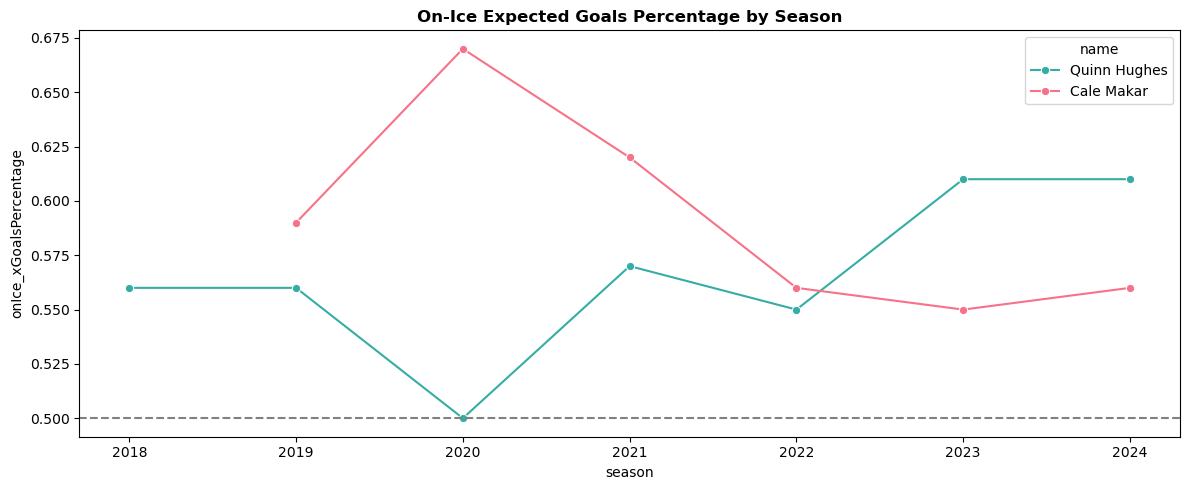

           name  OnIce_F_xGoals  OffIce_F_xGoals  OnIce_A_xGoals  OffIce_A_xGoals  Offense_Impact  Defense_Impact  Total_Impact
0    Cale Makar      109.121667           104.47       78.225000       111.065000        4.651667       32.840000     37.491667
1  Quinn Hughes       90.404286            91.07       67.705714       120.888571       -0.665714       53.182857     52.517143


In [21]:
# On-ice impact visualization
plt.figure(figsize=(12, 5))

# On-ice xGoals percentage by season with line plot
sns.lineplot(data=analysis_df, x='season', y='onIce_xGoalsPercentage', hue='name', marker='o', palette=colors)
plt.title('On-Ice Expected Goals Percentage by Season', fontweight='bold')
# Add horizontal line at 50%
plt.axhline(0.5, color='gray', linestyle='--', label='League Average (50%)')

# Show the plot
plt.tight_layout()
plt.show()

# show impact of players
impact_df = analysis_df.groupby('name')[[
    'OnIce_F_xGoals', 'OffIce_F_xGoals',
    'OnIce_A_xGoals', 'OffIce_A_xGoals'
]].mean().reset_index()

impact_df['Offense_Impact'] = impact_df['OnIce_F_xGoals'] - impact_df['OffIce_F_xGoals']
impact_df['Defense_Impact'] = impact_df['OffIce_A_xGoals'] - impact_df['OnIce_A_xGoals']  
impact_df['Total_Impact'] = impact_df['Offense_Impact'] + impact_df['Defense_Impact']

print(impact_df.to_string())


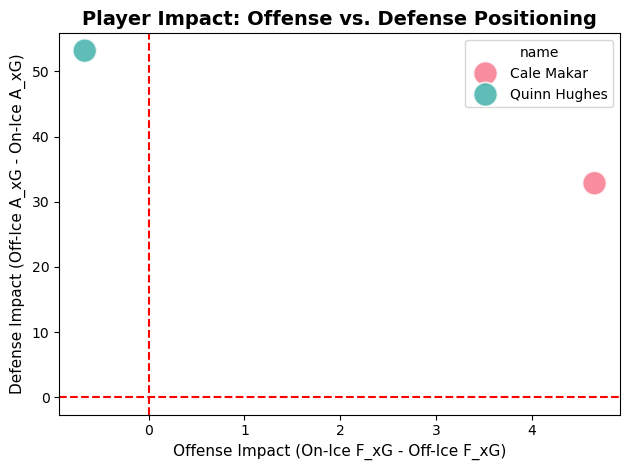

In [22]:
# 2. plot scatter plot
ax = sns.scatterplot( data=impact_df, x='Offense_Impact', y='Defense_Impact', hue='name', s=300, alpha=0.8, legend='full', palette=colors)

# 4. add zero lines
plt.axhline(0, color='red', linestyle='--') 
plt.axvline(0, color='red', linestyle='--')

plt.title('Player Impact: Offense vs. Defense Positioning', fontsize=14, weight='bold')
plt.xlabel('Offense Impact (On-Ice F_xG - Off-Ice F_xG)', fontsize=11)
plt.ylabel('Defense Impact (Off-Ice A_xG - On-Ice A_xG)', fontsize=11)

plt.tight_layout()
plt.show()

#### 3.5-Obeservation of on-ice influence
1. **On-Ice Expected Goals Percentage**
- Cale Makar has remained consistently dominant, never below 55%.
- His 2020 peak (~68%) shows he was on the ice for 67% of all high-quality chances.
- Quinn Hughes dipped to 50% in 2020
- but he has steadily improved, surpassing 60% in the last two seasons and surpass Cale.
2. **Impact**
- Total Impact: Quinn Hughes is slightly better overall (+52.52) than Cale Makar (+37.49)..
- Defense Impact: Both players are excellent on defense. Hughes is superior at suppressing opponent shots (+53.18) compared to Makar (+32.84).
- Offense Impact: Makar is a positive threat on offense (+4.65). Hughes is slightly negative on offense (-0.67), meaning his team creates fewer scoring chances when he's on the ice.
- Makar helps both offense and defense, but Hughes' impact is primarily due to his elite defense.

## 4. Draw Insights & Reflect

### Key Findings Summary
Both players are elite defensemen, but their values is different.
- Cale Makar offers greater offensive advantage, he has stronger goal-scoring impact like higher GPG and better shot quality, and more consistent high-end performance. Cale Makar is the more balanced, two-way offensive defensemen. Also in defense core data comparison, Cale Makar has better performance.
- Quinn Hughes provides elite defensive influence on the team, but the other metric is weaker than Cale. Especially this role is defenseman role, Quinn Hughes's Defense role data perfomance is not very good. 
### Conclusion
- Cale Makar is the better trade target, especially if needs a dynamic, game-changing defenseman who can drive offense and you want have a hight-volume scorer for defense positon.